# Camera! Action! 

## Understand business goals - 

Always understand the business goals first. Your work will depend on the goals and the overall result is good only if you got them all correctly 



Business goal – increase profits  

Increase the viewership overseas -> US 

Increase the profits 

# We – Data Scientists 

# Client 

## Sales and marketing team in Movie Companies (e.g. Fox, Buena Vista, Lionsgate) 

## Business goal 

increase profits  

Increase the viewership overseas -> US 

Increase the profits 


## Actionable Insights 

Recall that the project is to analyse the profits made by each movie Genre type in different markets (overseas vs USA), and then come up with recommendations for the sales & marketing team to improve profits of each genre in different markets.


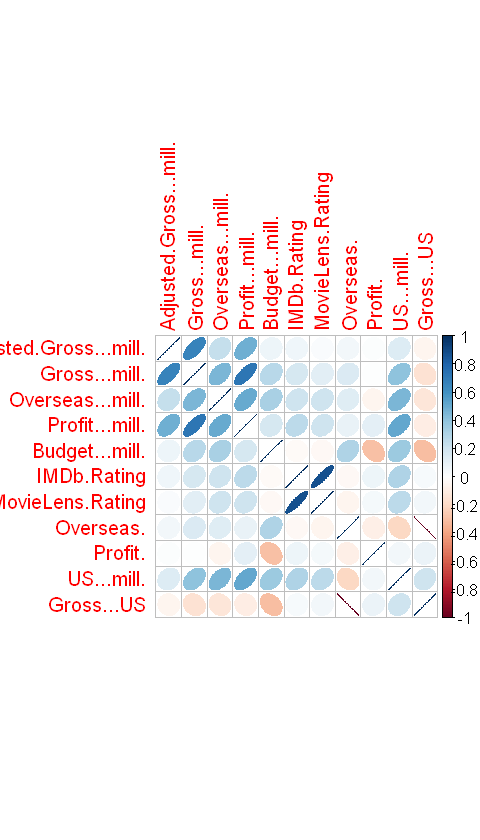

In [130]:
library(corrplot)
#str(data[,c("Budget...mill.", "IMDb.Rating","MovieLens.Rating","Overseas.","Profit.","US...mill.","Gross...US","Adjusted.Gross...mill." )])
#str(as.numeric(data[,c("Budget...mill.", "IMDb.Rating","MovieLens.Rating","Overseas.","Profit.","US...mill.","Gross...US","Adjusted.Gross...mill.")]))
#as.numeric(data(Day.of.Week))
#a <-as.numeric(data(Release.Date))
data$Adjusted.Gross...mill. <-as.numeric(data$Adjusted.Gross...mill.)
data$Gross...mill. <-as.numeric(data$Gross...mill.)
data$Overseas...mill. <-as.numeric(data$Overseas...mill.)
data$Profit...mill. <-as.numeric(data$Profit...mill.)
corr <- cor(data[,c('Adjusted.Gross...mill.','Gross...mill.','Overseas...mill.','Profit...mill.',"Budget...mill.", "IMDb.Rating","MovieLens.Rating","Overseas.","Profit.","US...mill.","Gross...US")])
corrplot(corr, method="ellipse")

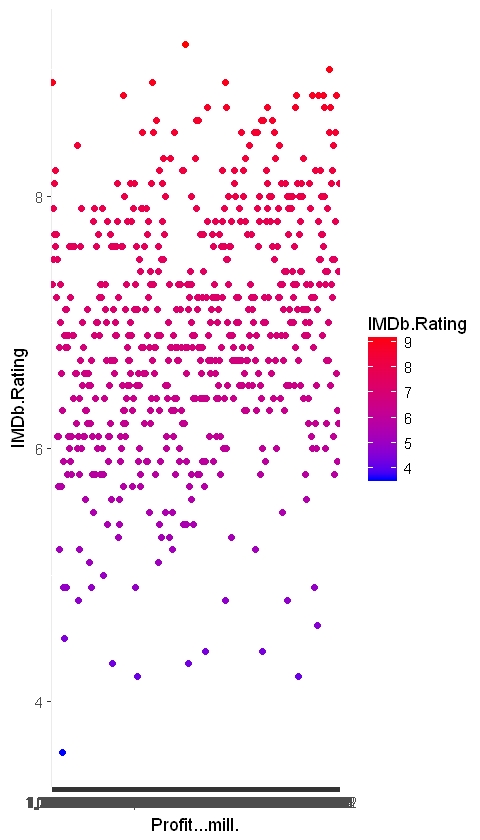

In [69]:
ggplot(data, aes(x=Profit...mill., y=IMDb.Rating), bins=60)+geom_point(aes(color=IMDb.Rating)) +scale_color_gradient(low='blue', high='red')

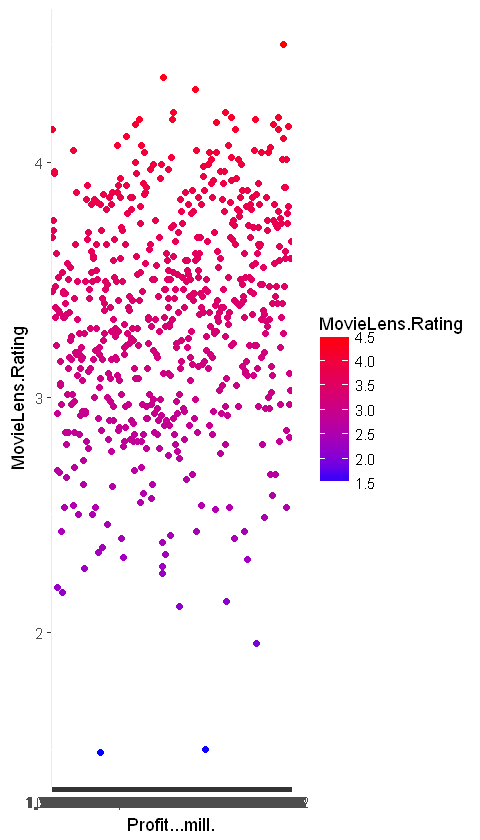

In [70]:
ggplot(data, aes(x=Profit...mill., y= MovieLens.Rating), bins=60)+geom_point(aes(color=MovieLens.Rating)) +scale_color_gradient(low='blue', high='red')

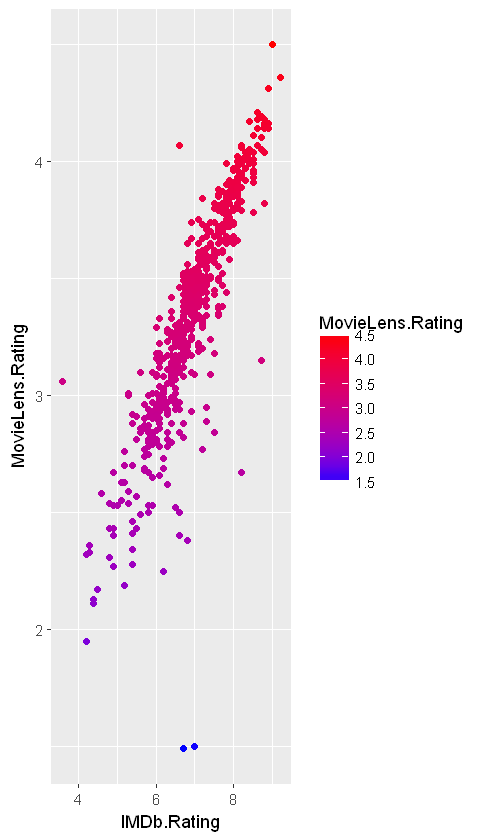

In [12]:
ggplot(data, aes(x= IMDb.Rating, y=MovieLens.Rating), bins=60)+geom_point(aes(color=MovieLens.Rating)) +scale_color_gradient(low='blue', high='red')

## Analysis Results:

No definite correlation between the ratings and protfit

## Action Item: 

Do not prioritise the ratings


## Why Bad movies with poor ratings can generate profits?

Example:

Transformers: Age of Extinction made $300 million in its first weekend of release. 

It's also one of the worst-reviewed movies of the year 

The reviews don't matter, though; the people who showed up and bought their ticket tell the story, especially overseas. 

importance of the Chinese market has become an interesting story when it comes to these films with huge budgets 

## Why Good Movies with high ratings cannot generate high profits

Examples:

Shawshank Redemption:
This film is ranked No. 1 on IMDb's Top Rated Films list.
It should be required viewing for every human being.
It is a masterpiece and shockingly, it did terribly at the box office,
despite all the love from critics and the Academy (seven Oscar nominations, including Best Picture).
Morgan Freeman blamed the hard-to-say title, but once it hit VHS and basic cable,
that's when the film became a hit.

In [36]:
data %>%
group_by(Genre)%>%
summarise(Num_Movies =n())




mean(data$Genre, na.rm=TRUE)

Genre,Num_Movies
action,236
adventure,50
animation,97
biography,14
comedy,91
crime,10
documentary,2
drama,52
fantasy,6
horror,8


Warning message in mean.default(data$Genre, na.rm = TRUE):
"argument is not numeric or logical: returning NA"

[1] NA

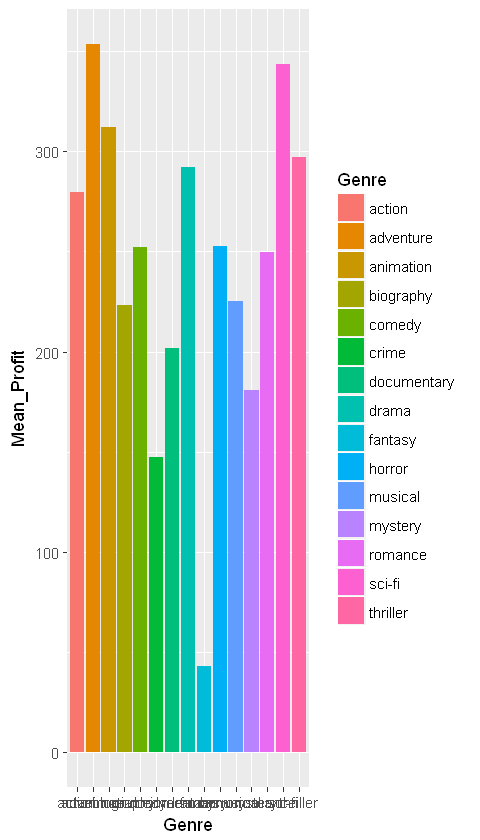

In [132]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_Profit = mean(as.numeric(Profit...mill.)))%>%
arrange(desc(Mean_Profit))
ggplot(df, aes(x=Genre,y=Mean_Profit,fill=Genre))+geom_bar(stat="identity")

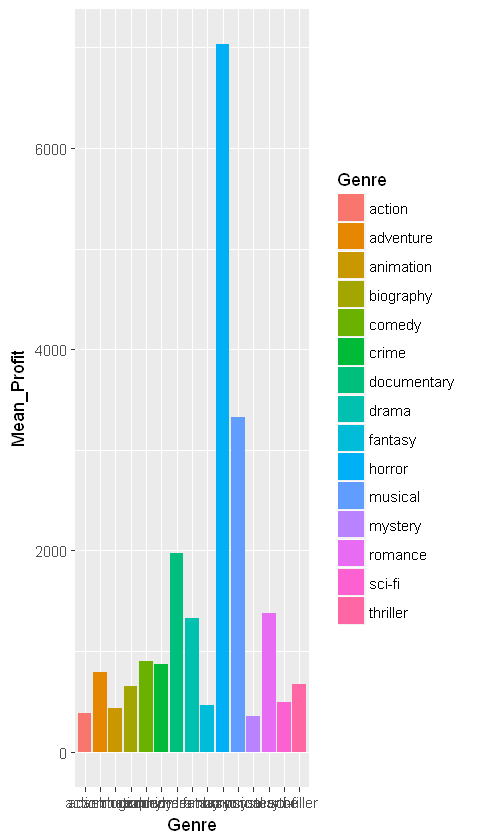

In [133]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_Profit = mean((Profit.)))%>%
arrange(desc(Mean_Profit))
ggplot(df, aes(x=Genre,y=Mean_Profit,fill=Genre))+geom_bar(stat="identity")

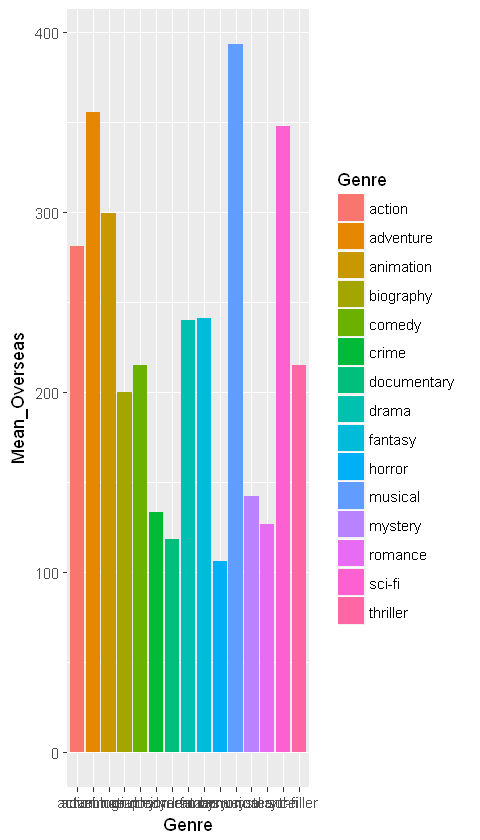

In [134]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_Overseas = mean(as.numeric(Overseas...mill.)))%>%
arrange(desc(Mean_Overseas))
ggplot(df, aes(x=Genre,y=Mean_Overseas,fill=Genre))+geom_bar(stat="identity")

In [109]:
data %>%
group_by(Genre)%>%
summarise(Mean_Overseas = mean(as.numeric(Overseas...mill.)))%>%
arrange(desc(Mean_Overseas))

Genre,Mean_Overseas
musical,393.5000
adventure,355.9200
sci-fi,347.7500
animation,299.7113
action,281.0085
fantasy,241.1667
drama,240.0000
comedy,215.2088
thriller,214.7333
biography,200.2143


## Analysis Results:

Top 3 genre for the overseas market

- Musical
- Adventure
- Sci-fi

## Action Item: 
Focus on those 3 genres

In [110]:
data %>%
group_by(Genre)%>%
summarise(Mean_Overseas = mean((Overseas.)))%>%
arrange(desc(Mean_Overseas))

Genre,Mean_Overseas
fantasy,63.08333
sci-fi,60.48125
adventure,59.71800
animation,59.46289
documentary,59.40000
action,58.90466
drama,57.70577
mystery,57.53333
thriller,57.19333
romance,55.25000


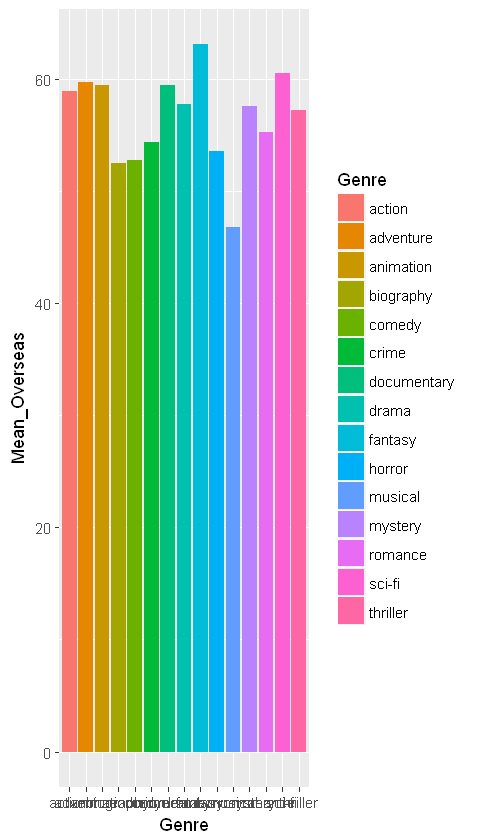

In [135]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_Overseas = mean((Overseas.)))%>%
arrange(desc(Mean_Overseas))
ggplot(df, aes(x=Genre,y=Mean_Overseas,fill=Genre))+geom_bar(stat="identity")

## Analysis Results:

Top 3 genre for the overseas in terms of percentage of profit

Percentage of profit = profit/budget

- Fantasy
- Sci-fi
- Adventure

## Action Item: 

Focus on those 3 genres

In [111]:
data %>%
group_by(Genre)%>%
summarise(Mean_US = mean(as.numeric(US...mill.)))%>%
arrange(desc(Mean_US))

Genre,Mean_US
sci-fi,237.0563
adventure,199.5960
fantasy,186.6167
animation,177.2959
action,172.3275
drama,165.4981
musical,153.8500
thriller,147.7600
comedy,137.6407
biography,134.6714


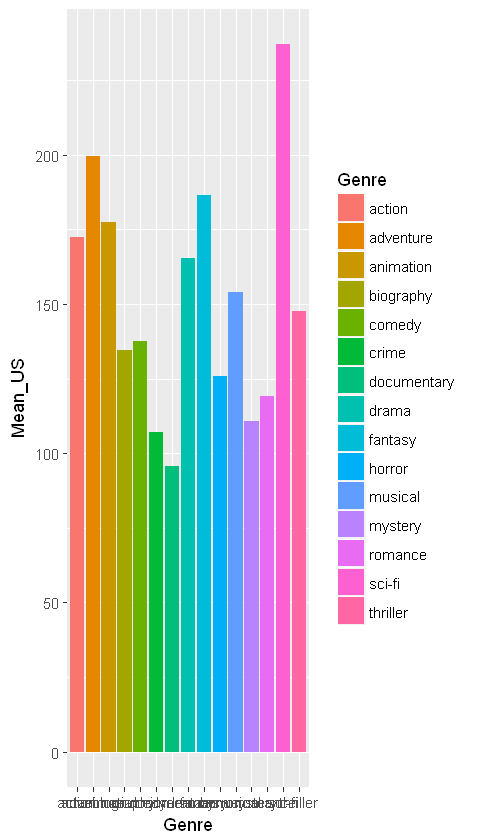

In [131]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_US = mean(as.numeric(US...mill.)))%>%
arrange(desc(Mean_US))
ggplot(df, aes(x=Genre,y=Mean_US, fill=Genre))+geom_bar(stat="identity")

## Analysis Results:

Top 3 genre for the US

- Sci-fi
- Adventure
- Fantasy

## Action Item: 

Focus on those 3 genres

In [112]:
data %>%
group_by(Genre)%>%
summarise(Mean_US = mean((Gross...US)))%>%
arrange(desc(Mean_US))

Genre,Mean_US
musical,53.25000
biography,47.51429
comedy,47.27363
horror,46.46250
crime,45.68000
romance,44.75000
thriller,42.80667
mystery,42.46667
drama,42.29423
action,41.09534


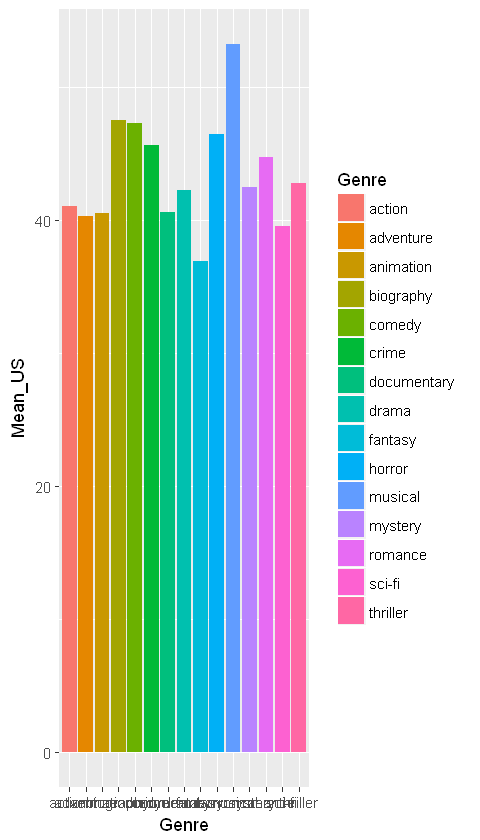

In [136]:
df <- data %>%
group_by(Genre)%>%
summarise(Mean_US = mean((Gross...US)))%>%
arrange(desc(Mean_US))
ggplot(df, aes(x=Genre,y=Mean_US,fill=Genre))+geom_bar(stat="identity")

## Analysis Results:

Top 3 genre for the US in terms of percentage of profit

Percentage of profit = profit/budget

- Musical
- Biography
- Comedy

## Action Item: 
Focus on those 3 genres